# 1. Generate a sample from Poisson (Binomial, Gaussian) distribution 


In [4]:
from scipy.stats import binom, poisson, norm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np


def generate_samples(distribution, **kwargs):
    return distribution.rvs(**kwargs)

from statsmodels.stats.gof import gof_binning_discrete

from scipy import stats


# 2. Test the hypothesis that the parameter is equal to a given value. Take correct and incorrect values and compare the test results


## Биномиальное распределение: проверка с истинным р 

Test passed


(array([  4.,   3.,   9.,  18.,  25.,  67.,  65., 137.,  70.,  66., 159.,
         64., 120.,  61.,  39.,  53.,  13.,  15.,   4.,   8.]),
 array([26. , 27.4, 28.8, 30.2, 31.6, 33. , 34.4, 35.8, 37.2, 38.6, 40. ,
        41.4, 42.8, 44.2, 45.6, 47. , 48.4, 49.8, 51.2, 52.6, 54. ]),
 <BarContainer object of 20 artists>)

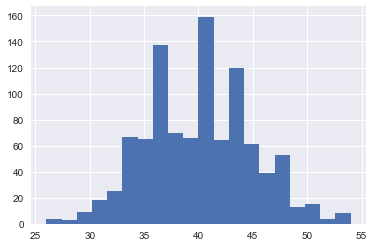

In [5]:
p = 0.4
n = 100
alpha = 0.05
samples = generate_samples(binom, p=p, n=n, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, binom, (n, p))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')
    
plt.hist(samples, bins=20)

##  Биномиальное распределение: проверка с p/2


In [6]:
p = 0.4
n = 100
alpha = 0.05
samples = generate_samples(binom, p=p, n=n, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, binom, (n, p/2))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')


Test failed


## Распределение Пуассона: проверка с истинным $\mu$

Test passed


(array([683.,   0.,   0.,   0.,   0., 254.,   0.,   0.,   0.,   0.,  53.,
          0.,   0.,   0.,   0.,   8.,   0.,   0.,   0.,   2.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 20 artists>)

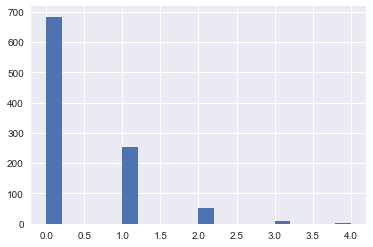

In [7]:
mu = 0.4
alpha = 0.05
samples = generate_samples(poisson, mu=mu, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, poisson, (mu, ))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')
plt.hist(samples, bins=20)

## Распределение Пуассона: проверка с $\frac{\mu}{2}$

In [8]:
mu = 0.4
alpha = 0.05
samples = generate_samples(poisson, mu=mu, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, poisson, (mu/2, ))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')

Test failed


## Нормальное распределение: проверка с истинными значением среднего

Test passed


(array([  2.,   5.,  11.,  24.,  20.,  22.,  50.,  71., 105., 100., 119.,
        123., 115.,  79.,  55.,  39.,  25.,  17.,  11.,   7.]),
 array([-5.2180748 , -4.63221271, -4.04635062, -3.46048854, -2.87462645,
        -2.28876436, -1.70290227, -1.11704018, -0.53117809,  0.054684  ,
         0.64054609,  1.22640818,  1.81227027,  2.39813236,  2.98399445,
         3.56985654,  4.15571863,  4.74158072,  5.32744281,  5.9133049 ,
         6.49916699]),
 <BarContainer object of 20 artists>)

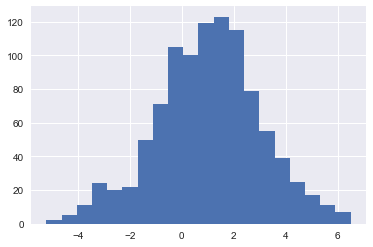

In [9]:
loc = 1
scale = 2
samples = generate_samples(norm, loc=loc, scale=scale, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, norm, (loc, scale))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')
plt.hist(samples, bins=20)

## Нормальное распределение: проверка со значением среднего в два раза меньше истинного

In [10]:
loc = 1
scale = 2
samples = generate_samples(norm, loc=loc, scale=scale, size=1000)

freq, exp_freq, histsupp = gof_binning_discrete(samples, norm, (loc/2, scale))

(chi_val, p_val) = stats.chisquare(freq, exp_freq)

if p_val >= alpha:
    print('Test passed')
else:
    print('Test failed')

Test failed


## Функция лог-правдоподобия (без логарифма маленькие значения, меньше машинной точности)

In [11]:
def norm_likelihood(loc=loc, scale=scale, samples=samples):
    return np.log(norm.pdf(samples, loc=loc, scale=scale)).sum()

In [12]:
norm_likelihood(loc=loc, scale=scale, samples=samples[:10])

-22.017097810001108

# 3. Construct the likelihood function and find the maximum likelihood estimate (MLE) ofthe parameter (for Gaussian only)


## Оценка MLE для среднего

In [13]:
from scipy.optimize import minimize

In [14]:
def neg_likelihood(*args, **kwargs):
    return -norm_likelihood(*args, **kwargs)

In [15]:
from functools import partial
minimize(partial(neg_likelihood, samples=samples[:10], scale=scale), x0=0.5)

      fun: 21.730091825057784
 hess_inv: array([[0.39999998]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.47917076])

# 4. Construct the prior distribution (gamma, Gaussian, beta) from this sample


In [16]:
from scipy.stats import beta, binom

In [17]:
p = 0.4
n = 100
size = 1000
samples = generate_samples(binom, p=p, n=n, size=size)

(array([  1.,   9.,  45., 120., 285., 260., 203.,  57.,  16.,   4.]),
 array([22. , 25.5, 29. , 32.5, 36. , 39.5, 43. , 46.5, 50. , 53.5, 57. ]),
 <BarContainer object of 10 artists>)

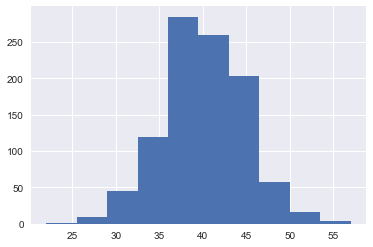

In [18]:
plt.hist(samples)

$$\mathbb{E}\left[x\right] = np$$
$$\mathbb{V}\left[x\right] = np(1-p)$$
$$1-p = \frac{\overline{\sigma}}{\overline{\mu}} \quad \Rightarrow \quad p = 1 -  \frac{\overline{\sigma}}{\overline{\mu}}$$
$$n = \dfrac{\overline{\mu}}{1 - \frac{\overline{\sigma}}{\overline{\mu}}}$$

$$\mathbb{E}(p) = \dfrac{\alpha}{\alpha + \beta} = 1 -  \frac{\overline{\sigma}}{\overline{\mu}}$$
Возьмем в качестве $\beta = y - \alpha,\ \alpha = py $. Если $y = 1$, то $\alpha = p, \quad \beta = 1 - p$.



In [19]:
scaling_factor = 10
alpha = scaling_factor*(1 - samples.var()/samples.mean())
beta = scaling_factor - alpha

# 5. Generate a sample from Poisson (Gaussian, binomial) distribution (of a different size and with a different parameter value)

In [20]:
new_p = 0.2 
new_n = 100
new_size = 1000
new_samples = generate_samples(binom, p=new_p, n=new_n, size=new_size)

# 6. Construct the likelihood function and find the maximum likelihood estimate (MLE) of the parameter 

In [21]:
def likelihood(p, n=n, samples=samples):
    return np.prod(binom.pmf(samples, p=p, n=n))

Правдоподобие такое же, как у $N\cdot n$ испытаний Бернулли
$$L(p;x)= C(n, x) p^x(1-p)^{Nn-\sum x}$$
$$p_{MLE} = \frac{\sum x}{N\cdot n}$$

In [22]:
new_p_mle = new_samples.mean()/new_n
print(new_p_mle)

0.19960999999999998


# 7. Construct from the prior and likelihood the posterior distribution (gamma, Gaussian, beta).

In [23]:
from functools import partial
def approx_aposteriori(p, n, samples):
    return likelihood(p, n, samples=samples)*beta.pmf(p, alpha=alpha, beta=beta)

$$f(x|n, \alpha, \beta) = \int_0^1 L(p;x) \pi(p|\alpha, \beta) dp = {n\choose k} \dfrac{B(x + \alpha, n - x + \beta)}{B(\alpha, \beta)}$$

https://en.wikipedia.org/wiki/Beta-binomial_distribution

In [24]:
from scipy.stats import betabinom

# 8. Construct a histogram of the posterior and compare with the histogram of its Gaussian approximation

4.40214958893122
5.59785041106878


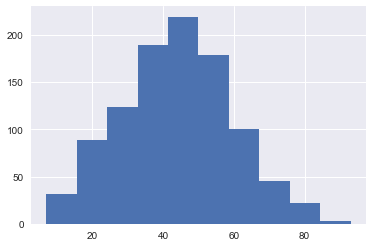

In [25]:
aposteri_samples = generate_samples(betabinom, n=new_n, a=alpha, b=beta, size=new_size)
plt.hist(aposteri_samples)
print(alpha)
print(beta)

In [26]:
#TODO Gaussian approximation

# 9. Generate a sample from posterior

In [27]:
aposteri_samples


array([55, 33, 52, 42, 45, 43, 46, 17, 53, 46, 52, 18, 33, 49, 42, 19, 21,
       46, 55, 58, 22, 37, 28, 59, 36, 53, 59, 36, 26, 67, 48, 55, 43, 20,
       52, 19, 14, 54, 28, 40, 39, 26, 44, 15, 44, 21, 30, 35, 23, 28, 55,
       23, 54, 21, 92, 46, 50, 13, 41, 60, 40, 54, 47, 26, 31, 32, 65, 57,
       40, 57, 62, 50, 45, 44, 35, 52, 47, 24, 55, 34, 35, 48, 38, 51, 33,
       93, 47, 72, 20, 66, 61, 75, 55, 65, 49, 29, 39, 41, 29, 40, 27, 13,
       33, 19, 50, 31, 39, 49, 40, 52, 25, 43, 37, 43, 69, 33, 60, 21, 42,
       18, 18, 35, 48, 61, 26, 41, 56, 20, 53, 18, 59, 50, 49, 50, 25, 41,
       84, 45, 82, 50, 63,  9, 45, 45, 15, 15, 35, 46, 71, 38, 21, 67, 48,
       46, 47, 49, 45, 49, 29, 76, 50, 59, 47, 70, 44, 44, 38, 41, 29, 39,
       28, 29, 65, 74, 45, 34, 65, 40, 22, 78, 28, 18, 53, 59, 34, 20, 66,
       55, 52, 64, 49, 34, 71, 48, 26, 46, 31, 47, 49, 57, 80, 33, 54, 49,
       67, 57, 26, 67, 43, 45, 41, 39, 41, 57, 57, 45, 61, 40, 31, 24, 52,
       30, 16, 27, 37, 62

# 10. Find theoretical and sample posterior mean, median, variance, and st. deviation of the parameter.


In [28]:
import numpy as np

### Posterior mean

$$
\bar{\theta}=\int \theta p(\theta \mid \boldsymbol{y}) d \theta
$$
where
$$
p(\theta \mid y) \equiv p(\theta \mid \bar{y})=\frac{\beta^{\bar{\alpha}}}{\Gamma(\bar{\alpha})} \theta^{\bar{\alpha}-1} \mathrm{e}^{-\bar{\beta} \theta}
$$
$$
\bar{\theta}=\frac{1}{B(\bar{\alpha}, \bar{\beta})} \int_{0}^{1} \theta \theta^{\bar{\alpha}-1}(1-\theta)^{\bar{\beta}-1} d \theta
$$

$$
for\ beta-binomial\ distribution\ mean\ is\ \frac{n \alpha}{\alpha+\beta}
$$

In [29]:
theta = n*alpha/(alpha + beta)
aposteri_samples_mean = np.mean(aposteri_samples)
print(theta, aposteri_samples_mean )

44.0214958893122 43.762


### Posterior median 

$$
0.5=\int_{\theta_{M}}^{1} p(\theta \mid y) d \theta
$$


In [30]:
aposteri_samples_median = np.median(aposteri_samples)
samples_median = np.median(samples)
print(samples_median, aposteri_samples_median)


40.0 44.0


### Variance

$$
\bar{\sigma}^{2}=\int(\theta-\bar{\theta})^{2} p(\theta \mid y) d \theta
$$
$$
\frac{1}{B(\bar{\alpha}, \bar{\beta})} \int_{0}^{1} \theta^{2} \theta^{\bar{\alpha}-1}(1-\theta)^{\bar{\beta}-1} d \theta
$$

$$
\frac{n \alpha \beta(\alpha+\beta+n)}{(\alpha+\beta)^{2}(\alpha+\beta+1)}
$$


In [31]:
samples_var = n*alpha*beta*(alpha + beta + n)/((alpha + beta + 1)*(alpha + beta)**2) #theoretical
aposteri_samples_var = np.var(aposteri_samples) 
print(sigma,aposteri_samples_var)

NameError: name 'sigma' is not defined

### Standart deviation

In [32]:
samples_std, aposteri_samples_std = np.std(samples), np.std(aposteri_samples)

samples_std, aposteri_samples_std

(4.725799826484402, 15.56140597761012)

# 11. Plot the confidence interval and Bayesian (credible) interval for the parameter mean.

#### Confidence interval 

$$
\bar{X}-z_{\alpha / 2}\left(\frac{\sigma}{\sqrt{n}}\right)<\mu<\bar{X}+z_{\alpha / 2}\left(\frac{\sigma}{\sqrt{n}}\right)\ where
$$  $$
\boldsymbol{\sigma}- standart\ deviation 
$$ 

$$
\begin{array}{|l|l|}
\hline \begin{array}{l}
\text { Confidence } \\
\text { Levels }
\end{array} & \begin{array}{l}
z \text { -Critical } \\
\text { Values }
\end{array} \\
\hline 50 \% & 0.674 \\
\hline 75 \% & 1.150 \\
\hline 90 \% & 1.645 \\
\hline 95 \% & 1.960 \\
\hline 99 \% & 2.575 \\
\hline 99.9 \% & 3.291 \\
\hline
\end{array}
$$

In [33]:
from scipy.stats import norm
import numpy as np

In [34]:
norm.ppf(0.975) #95%

1.959963984540054

In [35]:
norm.ppf(0.995) #99%

2.5758293035489004

In [36]:
norm.ppf(0.95) #90%

1.6448536269514722

In [37]:
import numpy as np
import scipy.stats as st

#define sample data
data = aposteri_samples

#create 95% confidence interval for population mean weight
con_int = st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 
print('Confidence interval:', con_int)


Confidence interval: (42.79585865241551, 44.72814134758449)


In [38]:
#create 99% confidence interval for same sample
conf_inter = st.norm.interval(alpha=0.99, loc=np.mean(data), scale=st.sem(data))
print('Confidence interval:', conf_inter)

Confidence interval: (42.49381337510908, 45.03018662489092)


In [39]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

Text(0.5, 1.0, 'Confidence interval')

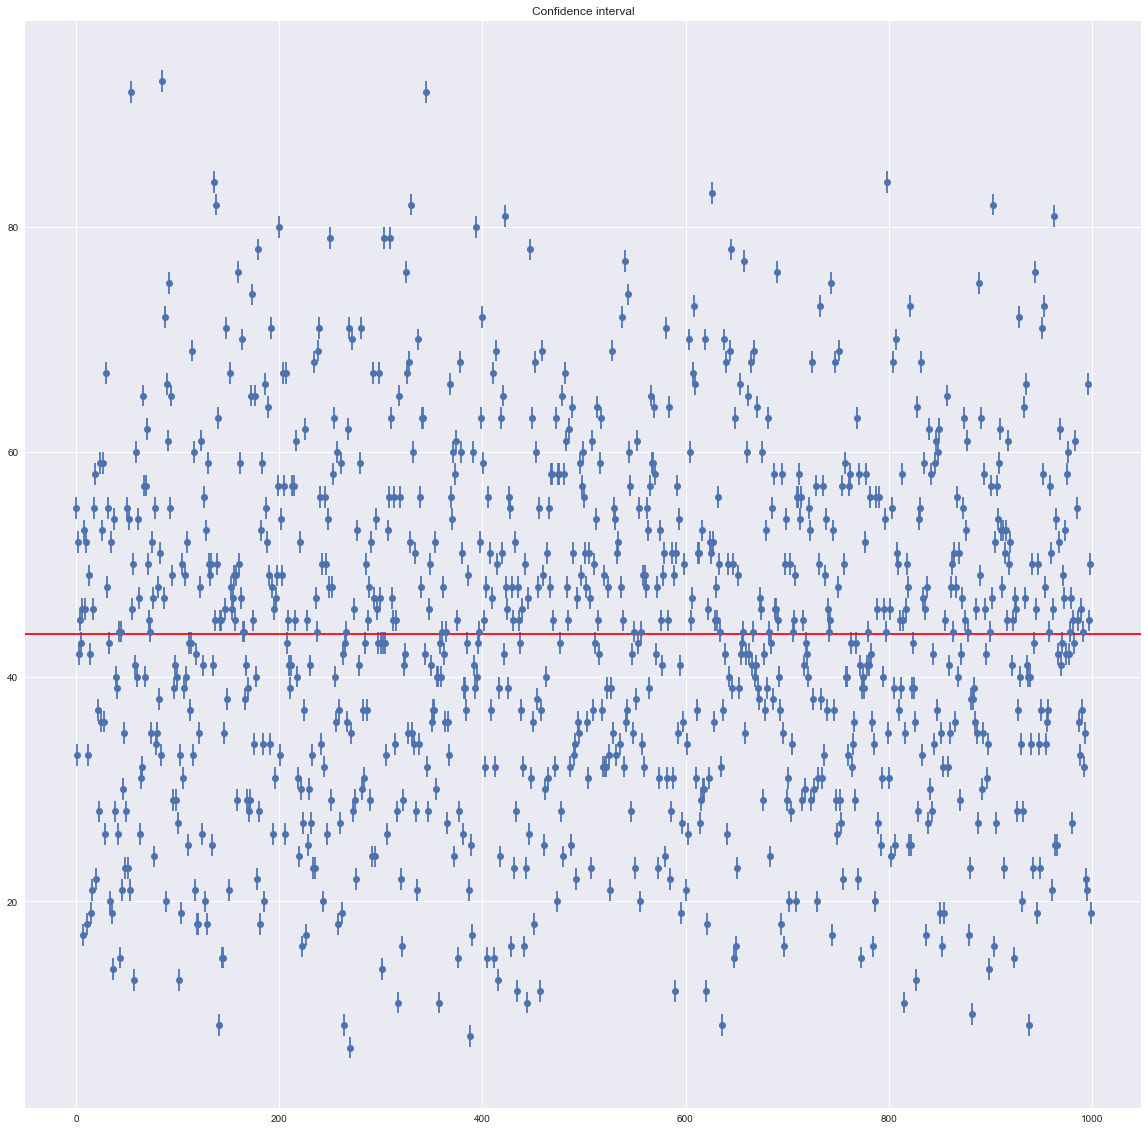

In [40]:
import numpy as np
import matplotlib.pyplot as plt



plt.figure(figsize=(20, 20))
mean, err = mean_confidence_interval(data=data)
plt.axhline(mean, color='r')

plt.errorbar(np.arange(len(aposteri_samples)), data, yerr=err, fmt='o')
plt.xticks(ticks=None)
plt.title("Confidence interval")


#### Вayesian credible interval

In [41]:

from scipy import stats
data = aposteri_samples
mean, var, std = stats.bayes_mvs(data)
print('Mean is:', mean, '\n', 'Variance is:', var, '\n', 'Std_dev is:', std)


Mean is: Mean(statistic=43.762, minmax=(42.95141929471886, 44.57258070528114)) 
 Variance is: Variance(statistic=242.88601404212636, minmax=(225.54744434912263, 261.33090080789253)) 
 Std_dev is: Std_dev(statistic=15.580893304578325, minmax=(15.018237058627175, 16.16573230039062))


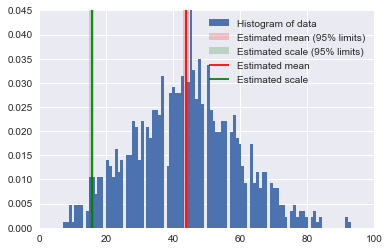

In [42]:
n_samples = 100000
data = aposteri_samples
res_mean, res_var, res_std = stats.bayes_mvs(data, alpha=0.95)

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data, bins=100, density=True, label='Histogram of data')
ax.vlines(res_mean.statistic, 0, 0.5, colors='r', label='Estimated mean')
ax.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='r',
           alpha=0.2, label=r'Estimated mean (95% limits)')
ax.vlines(res_std.statistic, 0, 0.5, colors='g', label='Estimated scale')
ax.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2,
           label=r'Estimated scale (95% limits)')

ax.legend(fontsize=10)
ax.set_xlim([0, 100])
ax.set_ylim([0, 0.045])
plt.show()

# 12. Build the Bayesian factor to test hypothesis H0: sample mean versus hypothesis H1: any other value (first try the parameter value with which you generated the sample).

From the previous tasks: 

In [49]:
print('alpha =', alpha, 'beta =', beta)

alpha = 4.40214958893122 beta = 5.59785041106878


Let's suppose that:

In [98]:
#alternative
alpha_1 = 10
beta_1 = 1

In [103]:
priors = ((alpha, beta), (alpha_1, beta_1))

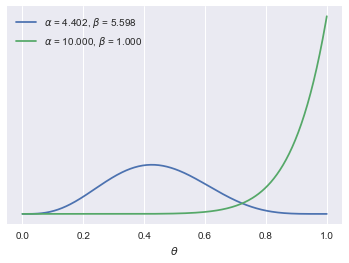

In [104]:
for a, b in priors:
    distri = scipy.stats.beta(a, b)
    x = np.linspace(0, 1, 300)
    x_pdf = distri.pdf(x)
    plt.plot(x, x_pdf, label=fr"$\alpha$ = {a:.3f}, $\beta$ = {b:.3f}")
    plt.yticks([])
    plt.xlabel("$\\theta$")
    plt.legend()

In [106]:
llh0 = betabinom.logpmf(data, n=new_n, a=priors[0][0], b=priors[0][1]).sum()
llh1 = betabinom.logpmf(data, n=new_n, a=priors[1][0], b=priors[1][1]).sum()

BF = np.exp(llh0-llh1)
print(round(BF, 3), round(1/BF, 3))

inf 0.0


/Users/beatrisa/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


Instead of working with sample mean, which is a quite uncomfortable statistics to work with in case of beta-binomial distribution, I calculate sample Bayes factor for two pairs of parameters $\alpha$ and $\beta$. The result I obtained shows that the BF factor is very high and thus favors true parameters instead of fake. The illustration above shows, how different these two distributions are. 